In [1]:
threads = 16
import os
os.environ["MKL_NUM_THREADS"] = str(threads)
os.environ["NUMEXPR_NUM_THREADS"] = str(threads)
os.environ["OMP_NUM_THREADS"] = str(threads)


import Functions as fn
import numpy as np
import CRUMPET
import matplotlib.pyplot as plt
import greenland_criterion as gc
import fc_mapping as fc
import scipy.interpolate as interpolate

## Testing model with Bolzmann fit

In [2]:
fn.gen_input('input_false.dat', vibr_lap=True, incl_ground=True, diss=False)
crm = CRUMPET.Crumpet('input_false.dat')

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 15/15 [00:00<00:00, 4222.74it/s]


Constructing functional emissivity matrix


100%|██████████| 15/15 [00:00<00:00, 6316.09it/s]


Constructing functional energy transfer matrix


100%|██████████| 15/15 [00:00<00:00, 6350.52it/s]


In [3]:
# Run CRM as function of temperature
Te_reso = 50
# crm.source[2] = 1e-10
iso_mass = 2
Hmin = False

# indx_mol = np.append(0,np.arange(1,)
Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
Tiv = Tev/iso_mass
ne = 1e16*np.ones(len(Tev))

fv_H2 = np.zeros((len(crm.species),len(Tev)))
for i in range(0,len(Tev)):
    fv_H2[:,i]=crm.steady_state(Tev[i],ne[i],Ti=Tiv[i],plot=False,dt=True)

fv_H2 = fv_H2/(np.sum(fv_H2, axis=0)[None,:])

/home/kobussen/Documents/CRUMPET/CRUMPET/crm.py:1377: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


array([-9.32234013e+10, -1.48359310e+10, -2.53896235e+09, -4.66556325e+08,
       -9.19843931e+07, -1.94526566e+07, -4.41307610e+06, -1.07415303e+06,
       -2.80596461e+05, -7.87054103e+04, -2.37257794e+04, -7.69680696e+03,
       -2.69303965e+03, -1.01936310e+03, -4.19010746e+02])

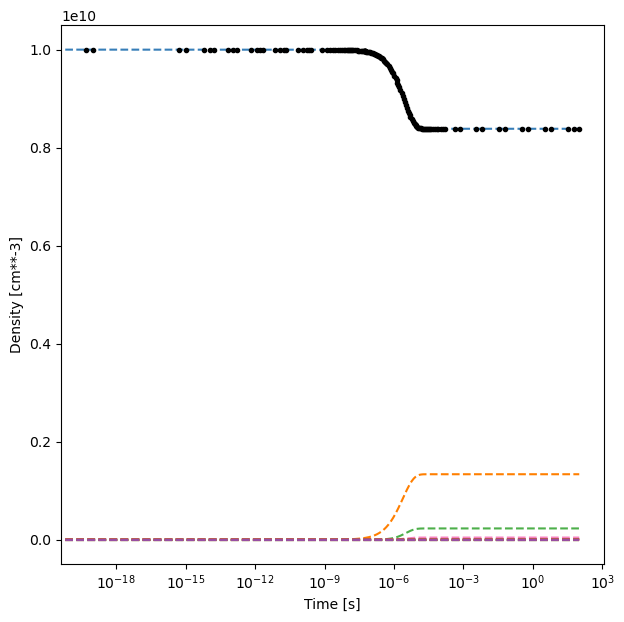

In [4]:
crm.steady_state(Tev[0],ne[0],Ti=Tiv[0],plot=True,dt=True)

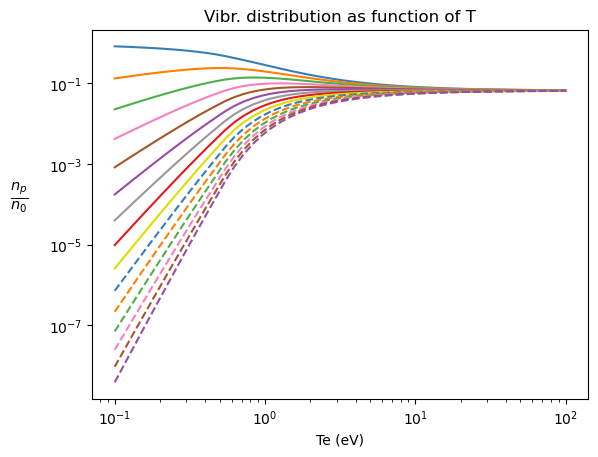

In [5]:
# Plot distribution
indx_X1 = np.append(0,np.arange(1,15))
plt.loglog(Tev, np.transpose(fv_H2[indx_X1]))
# plt.ylim(1e-3,1e-1)
plt.xlabel('Te (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.title('Vibr. distribution as function of T')
plt.show()

Text(0.5, 0, 'Temperature (eV)')

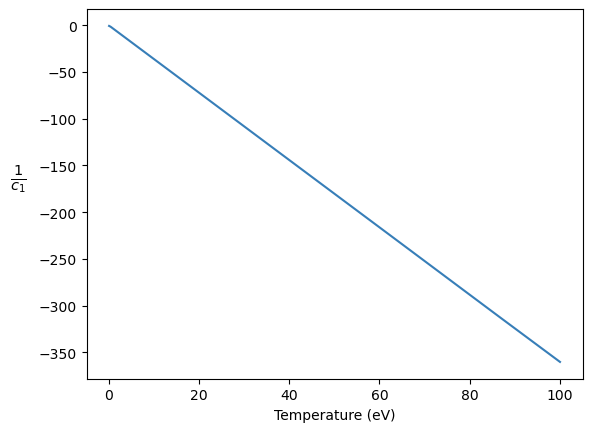

In [6]:
# Plot 1/c_1 as function of temperature
fv = fv_H2

err, coeff = fn.err_bolzmann(fv, Tev)
E = fn.D2_energies('Fantz/Table 1 Vib Eigenvalues/X1_EV.txt')


plt.plot(Tev, 1/coeff, label='H2VIBR')
plt.ylabel(r'$\frac{1}{c_1}$     ' ,rotation=0,size=15)
plt.xlabel('Temperature (eV)')

Text(0.5, 1.0, 'Deviation from Bolzmann distribution as a function of temperature')

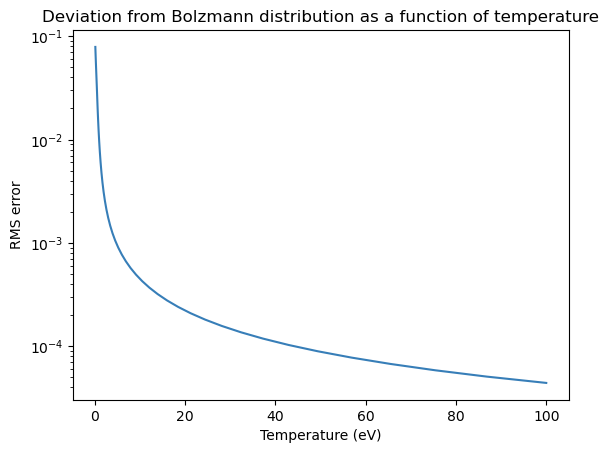

In [7]:
# Plot of the rms deviation from exponential fit
plt.figure()
plt.yscale('log')
plt.plot(Tev,err)
# plt.plot(Tev,err_ichi, label='Ichihara')
plt.ylabel('RMS error')
plt.xlabel('Temperature (eV)')
# plt.legend()
plt.title("Deviation from Bolzmann distribution as a function of temperature")

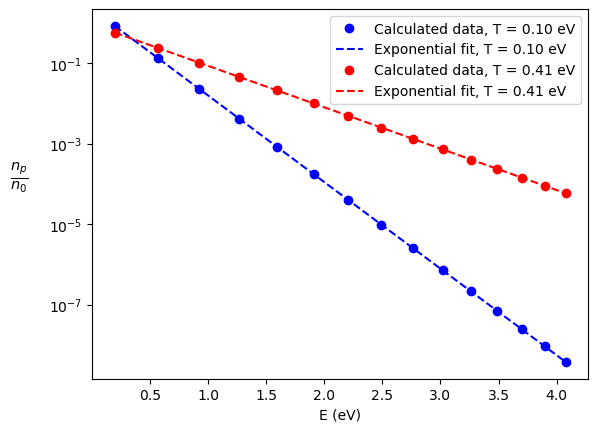

In [8]:
# Plot of distribution at given temperature
i = 0
plt.figure()
plt.yscale('log')
plt.plot(E,fv[:, i], 'bo', label='Calculated data, T = %1.2f eV' %Tev[i])

y = np.log(fv[:,i])
c = np.flip(np.polyfit(E,y, 1))

fit = fn.fit_eval(c,E)
plt.plot(E,fit,'b--', label='Exponential fit, T = %1.2f eV' %Tev[i])

i = 10
plt.plot(E,fv[:, i], 'ro', label='Calculated data, T = %1.2f eV' %Tev[i])

y = np.log(fv[:,i])
c = np.flip(np.polyfit(E,y, 1))

fit = fn.fit_eval(c,E)
plt.plot(E,fit,'r--', label='Exponential fit, T = %1.2f eV' %Tev[i])


plt.xlabel('E (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.legend()
plt.show()

## Generate input file for CRUMPET

The next cell can is used to generate an input file for CRUMPET. You can choose which reactions and species you want by marking them as True. 


In [9]:
fn.gen_input('input_fin.dat', vibr_lap = True, ion = True, B1=True, C1=True, EF1=True, a3=True, c3=True, d3=True,
             diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, inter_states=False, coll_deex=False, MA=True, MA_min=True)
# fn.gen_input('input_fin.dat', vibr_lap = True, ion = True, B1=True, C1=True, EF1=True, a3=True,
#              diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, inter_states=True, coll_deex=True, MA=True, MA_min=True)
# fn.gen_input('input_fin.dat', vibr_lap = True, diss=True)

Generating the CRM in CRUMPET

In [10]:
crm = CRUMPET.Crumpet('input_fin.dat')

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 106/106 [00:01<00:00, 93.00it/s]


Constructing functional emissivity matrix


100%|██████████| 106/106 [00:00<00:00, 134.42it/s]


Constructing functional energy transfer matrix


100%|██████████| 106/106 [00:00<00:00, 107.35it/s]


Run CRM as a function of temperature


In [11]:
# Initializing the indices for different species
indx_X1 = np.append(0,np.arange(1,14))
indx_B1 = np.append(14,np.arange(15,29))
indx_C1 = np.append(29,np.arange(30,44))
indx_EF1 = np.append(44,np.arange(45,59))
indx_a3 = np.append(59,np.arange(60,74))
indx_c3 = np.append(74,np.arange(75,89))
indx_d3 = np.append(89,np.arange(90,104))
indx_H2Plus = len(crm.species)-2
indx_Hmin = len(crm.species)-1

In [12]:
# Run CRM as function of temperature
Te_reso = 100
# crm.source[2]=1e-10
iso_mass = 2
Hmin = True


# T_vibr = 1e0
# E_X1 = fn.get_energies('X1Sg')
# for i,p in enumerate(indx_X1):
#     crm.source[p] = 1e18*np.exp(-E_X1[i]/T_vibr)
# # crm.source[2] = 1e-10

# Es = np.array([0.015,0.530,1.106,1.474,1.903,2.304,2.677,3.022,3.336])
# kb = 1.38e-23
# e = 1.602e-19
# Ts = 20000

# s = np.zeros(9)
# crm.source[:] = 0
# for i in range(len(Es)):
#     crm.source[min(indx_X1)+i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))
    #  s[i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))

indx_mol = np.append(2,np.arange(3,len(crm.species)-Hmin))
Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
Tiv = Tev/iso_mass
ne = 1e16*np.ones(len(Tev))



fv_H2 = np.zeros((len(crm.species),len(Tev)))
for i in range(0,len(Tev)):
    fv_H2[:,i]=crm.steady_state(Tev[i],ne[i],Ti=Tiv[i],plot=False,dt=True)
    print(i)

# fv_H2 = fv_H2/(np.sum(fv_H2[indx_mol],axis=0)[None,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


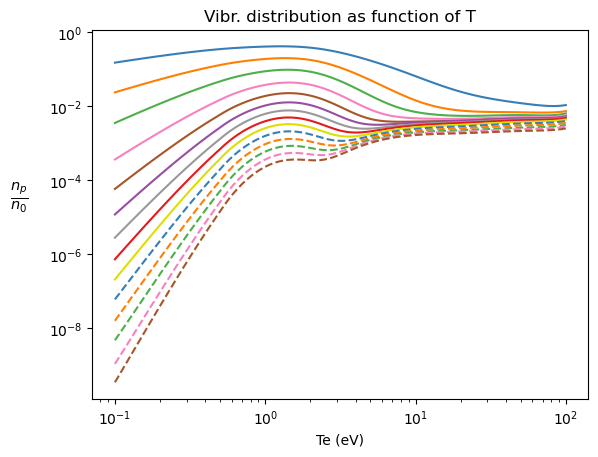

In [13]:
plt.loglog(Tev, np.transpose(fv_H2[indx_X1]))
# plt.ylim(1e-3,1e-1)
plt.xlabel('Te (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.title('Vibr. distribution as function of T')
plt.show()

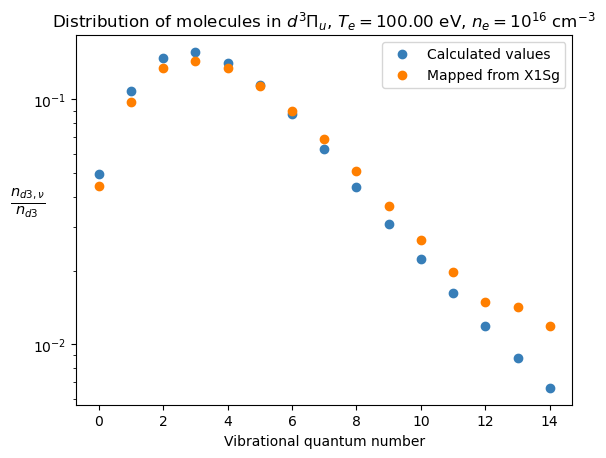

In [14]:
i=99
# plt.plot(fv_H2[indx_X1,i], label='H2[v] in ground state')
fv_d3 = fv_H2[indx_d3,i]
fv_d3 = fv_d3/np.sum(fv_d3[:-1])

fv_d3_mapped = fc.get_upper(ground=np.append(1,fv_H2[indx_X1,i]))
fv_d3_mapped = fv_d3_mapped/np.sum(fv_d3_mapped)

plt.plot(fv_d3,'o',label = 'Calculated values')
plt.plot(fv_d3_mapped,'o', label = 'Mapped from X1Sg')



# plt.plot(fv_d3, label='H2[v] in Fulcher (to be compared against experiment)')
plt.xlabel('Vibrational quantum number')
plt.ylabel(r'$\frac{n_{d3,\nu}}{n_{d3}}$',rotation=0, size = 15)
plt.yscale('log')
plt.title(r'Distribution of molecules in $d^3\Pi_u$, $T_e=%1.2f$ eV, $n_e= 10^{%1.0f}$ cm$^{-3}$' %(Tev[i], np.log10(ne[0])))
plt.legend()
plt.show()

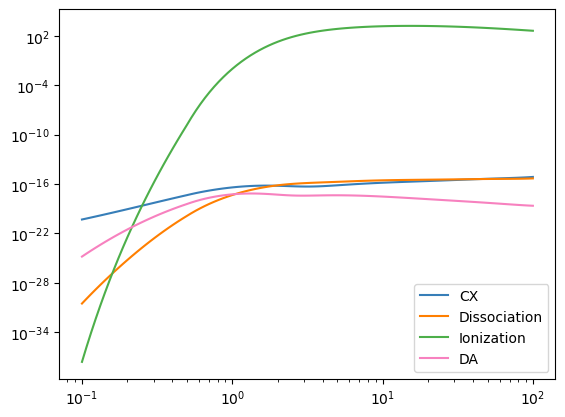

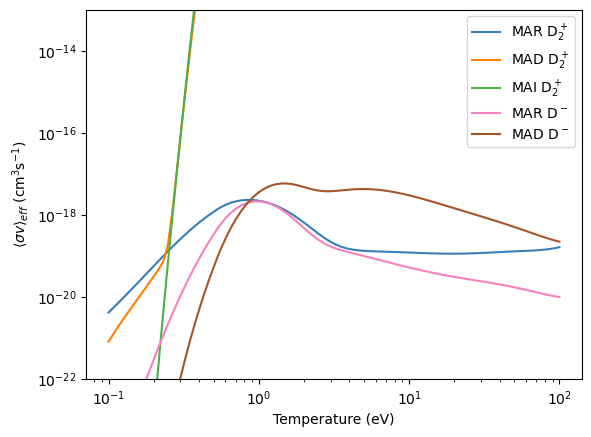

In [16]:
# Calculating MAR rates
r_cx, r_diss, r_ion, r_DA = fn.eff_rates(fv_H2,Tev,ne)

X=CRUMPET.ratedata.RateData(rates={'AMJUEL' : '/rates/amjuel.tex'})

# H2+ rates
diss_rec = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.14'],Tev,ne)
diss = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.12'],Tev,ne)
diss_ion = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.11'],Tev,ne)



# cx_Hmin = fn.eval_2D(X.reactions['AMJUEL']['H.4']['7.2.3a'],Tiv,ne)
cx_Hmin = fn.eval_2D(crm.reactions['AMJUEL']['H.4']['7.2.3a'].coeffs,Tiv,ne)
ion_Hmin = fn.eval_2D(crm.reactions['AMJUEL']['H.4']['7.2.3b'].coeffs,Tiv,ne)

f_cx = r_cx/(r_cx+r_ion)

MAR = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*diss_rec*f_cx
MAD = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*(f_cx*diss+(1-f_cx)*diss_rec)
MAI = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*(f_cx*diss_ion+(1-f_cx)*(diss+2*diss_ion))

MAR_Hmin = r_DA/(cx_Hmin+ion_Hmin)*cx_Hmin
MAD_Hmin = r_DA/(cx_Hmin+ion_Hmin)*ion_Hmin




plt.loglog(Tev,r_cx,label='CX')
plt.plot(Tev,r_diss,label='Dissociation')
plt.plot(Tev,r_ion,label='Ionization')
plt.plot(Tev,r_DA, label='DA')
plt.legend()
plt.show()

plt.figure()
plt.loglog(Tev, MAR,label=r'MAR D$_2^+$')
plt.plot(Tev,MAD,label=r'MAD D$_2^+$')
plt.plot(Tev,MAI,label=r'MAI D$_2^+$')
plt.loglog(Tev, MAR_Hmin,label=r'MAR D$^-$')
plt.plot(Tev,MAD_Hmin,label=r'MAD D$^-$')
plt.ylim(1e-22,1e-13)
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\langle\sigma v\rangle_{eff}$ (cm$^3$s$^{-1}$)')
plt.legend()




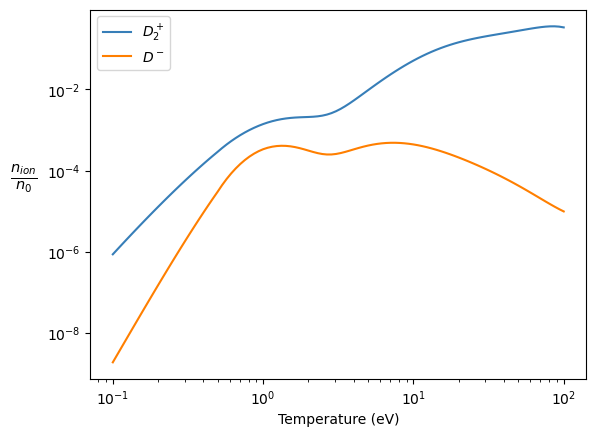

In [78]:
# Plot of D2+ and D- fractions
plt.loglog(Tev,fv_H2[indx_H2plus], label=r'$D_2^+$')
plt.loglog(Tev,fv_H2[indx_Hmin], label=r'$D^-$')
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\frac{n_{ion}}{n_0}$      ', rotation=0,size=15)
plt.legend()

Text(0.5, 1.0, '$T_e=3.3$ eV')

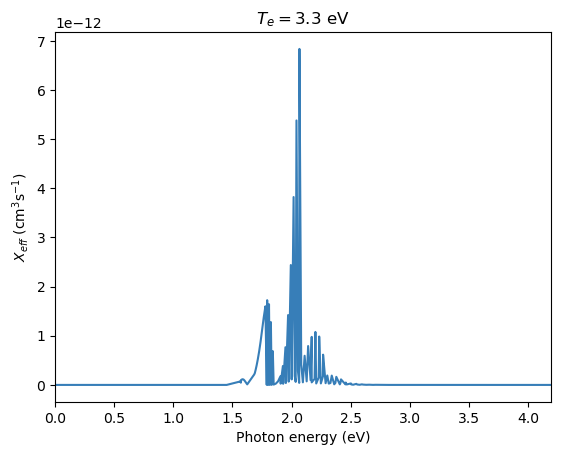

In [53]:
# Calculate effective line emission coefficients 
Xeff = fn.get_Xeff(crm,fv_H2,'d3Pu','a3Sg',ne)

i=50
plt.plot(Xeff[i][:,0],Xeff[i][:,1])
plt.xlim(max(0,min(Xeff[i][:,0])),max(Xeff[i][:,0]))
plt.xlabel('Photon energy (eV)');
plt.ylabel(r'$X_{eff}$ (cm$^3$s$^{-1}$)');
plt.title(r'$T_e=%1.1f$ eV'%Tev[i])

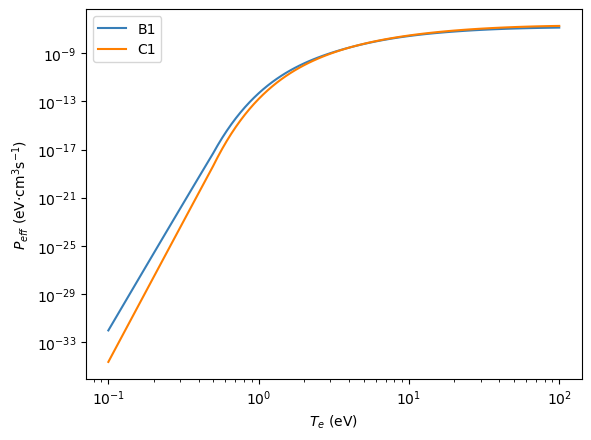

In [47]:
Xeff_B1 = fn.get_Xeff(crm,fv_H2,'B1Su','X1Sg',ne)
Xeff_C1 = fn.get_Xeff(crm,fv_H2,'C1Pu','X1Sg',ne)

Peff_B1 = np.zeros(len(Tev))
Peff_C1 = np.zeros(len(Tev))
for i in range(len(Tev)):
    Peff_B1[i] = np.sum(Xeff_B1[i][:,0]*Xeff_B1[i][:,1])
    Peff_C1[i] = np.sum(Xeff_C1[i][:,0]*Xeff_C1[i][:,1])

plt.loglog(Tev,Peff_B1, label='B1')
plt.loglog(Tev,Peff_C1, label='C1')
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$P_{eff}$ (eV$\cdot$cm$^3$s$^{-1}$)')
plt.legend()

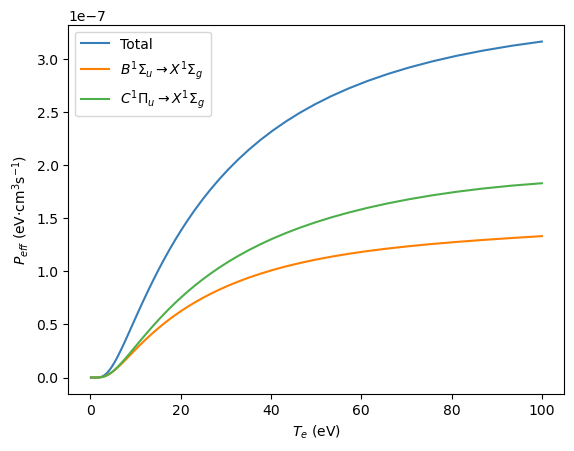

In [70]:
# Calculate total Peff
Xeff_B1 = fn.get_Xeff(crm,fv_H2,'B1Su','X1Sg',ne)
Xeff_C1 = fn.get_Xeff(crm,fv_H2,'C1Pu','X1Sg',ne)

Peff_B1 = np.zeros(len(Tev))
Peff_C1 = np.zeros(len(Tev))
Peff_Fulcher = np.zeros(len(Tev))
for i in range(len(Tev)):
    Peff_B1[i] = np.sum(Xeff_B1[i][:,0]*Xeff_B1[i][:,1])
    Peff_C1[i] = np.sum(Xeff_C1[i][:,0]*Xeff_C1[i][:,1])
    Peff_Fulcher[i] = np.sum(Xeff_Fulcher[i][:,0]*Xeff_Fulcher[i][:,1])



states = ['X1Sg','B1Su','C1Pu','EF1Sg','a3Sg','c3Pu','d3Pu']

Peff = np.zeros(len(Tev))
for p in states: 
    for q in states:
        try:
           Xeff = fn.get_Xeff(crm,fv_H2,p,q,ne)
           for i in range(len(Tev)):
                Peff[i] += np.sum(Xeff[i][:,0]*Xeff[i][:,1])
        except:
            pass


plt.plot(Tev,Peff, label='Total')
plt.plot(Tev,Peff_B1, label=r'$B^1\Sigma_u \rightarrow X^1\Sigma_g$')
plt.plot(Tev,Peff_C1, label=r'$C^1\Pi_u \rightarrow X^1\Sigma_g$')
# plt.ylim(1e-17,1e-6)
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$P_{eff}$ (eV$\cdot$cm$^3$s$^{-1}$)')
plt.legend()

Text(0.5, 1.0, '$T_e=3.3$ eV')

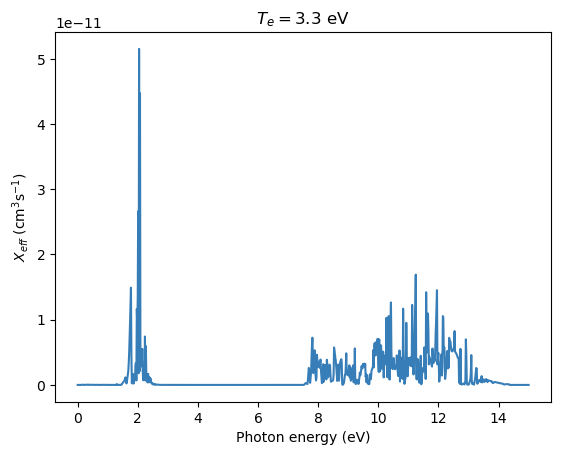

In [52]:
E = np.linspace(0,15,1000)
spec = np.zeros((len(Tev),len(E)))

for p in states: 
    for q in states:
        try:
           Xeff = fn.get_Xeff(crm,fv_H2,p,q,ne)
        except:
            pass
        for i in range(len(Tev)):
            o = interpolate.interp1d(Xeff[i][:,0],Xeff[i][:,1],bounds_error=False,fill_value = (0,0))
            spec[i,:] += o(E)

i=50
plt.plot(E,spec[i,:])
plt.xlabel('Photon energy (eV)');
plt.ylabel(r'$X_{eff}$ (cm$^3$s$^{-1}$)');
plt.title(r'$T_e=%1.1f$ eV'%Tev[i])

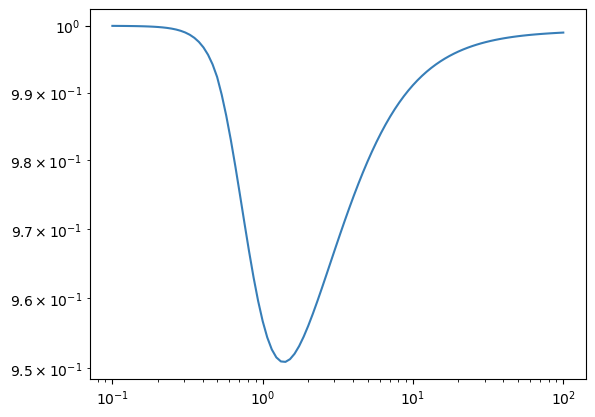

In [74]:
plt.loglog(Tev,(Peff_B1+Peff_C1)/Peff)

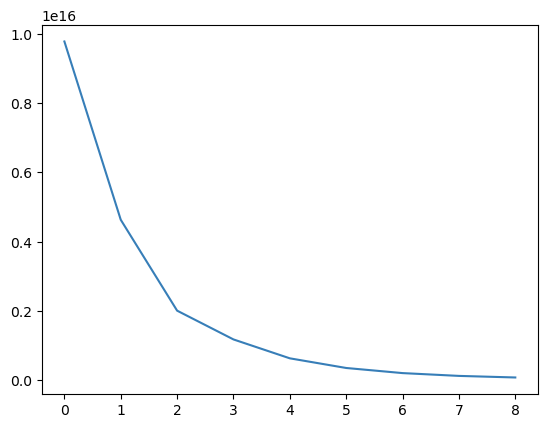

In [99]:
Es = np.array([0.015,0.530,1.106,1.474,1.903,2.304,2.677,3.022,3.336])
kb = 1.38e-23
e = 1.602e-19
Ts = 8000

s = np.zeros(9)
for i in range(len(Es)):
#     crm.source[min(indx_X1)+i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))
     s[i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))

plt.plot(s)


In [61]:
ne = 1e13
tau = 1e-10
M=crm.getM(100,ne)[0]/(ne*tau)

crm2 = gc.CRMAnalyser(M)
indx = crm2.getPotentialCRMs(tol=1e-3)
indx

# crm2.generateCRM(np.append(indx[1],103),exactMeff=True)


[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13, 104]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13, 104, 105])]